[-0.60488298  0.5632455   0.21482773]


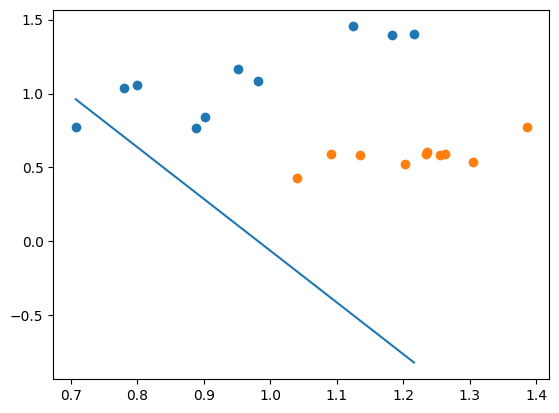

In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(22)

# generate 10 points per class
N = 10

X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = X1_1 + np.random.normal(loc = 0, scale = 0.15, size=N) + 0.1
Y1 = np.ones(N)

X1_2 = 2*np.random.normal(loc=0.6, scale=0.05, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) #X1 * 2 + np.random.normal(loc = 0, scale = 0.1, size=N)
Y2 = -np.ones(N)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

# generate w_0,....,w_n
w = np.random.uniform(low=-1,size=3)
print(w)
plt.plot([np.min(X1_1), np.max(X1_1)], [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]])


20

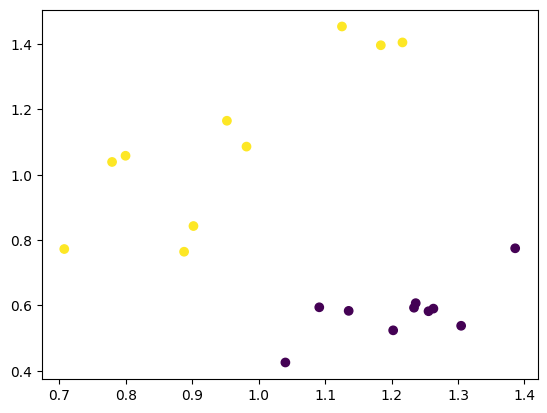

In [19]:
X0 = np.ones(N * 2)
#X0 = X0[:, np.newaxis]

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)

Y = np.concatenate((Y1, Y2))

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=Y)

Y.shape[0]

In [20]:
Y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

1.0
12


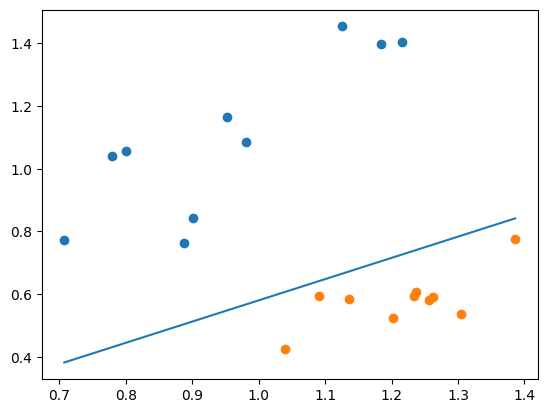

In [21]:
w_init = w

#np.random.seed(15)

# generate w_0,....,w_n
#w = np.random.uniform(low=-10, high=10, size=3)

# set checkpoint
num_errors = 0

# check epochs
epochs = 0

# set learning rate 0 < eta <= 1
eta = 1e+0

while True:
    
    epochs += 1
    
    for i in range(Y.shape[0]):
        x = X[i, :]
        y = Y[i]
        #print(x, y)
        
        dot_prod = np.dot(w, x)
        #print(dot_prod * y)
        
        if ((dot_prod * y) < 0):
            w = w + eta * (x * y)
            num_errors += 1
        
    if (num_errors == 0):
        break
    else:
        num_errors = 0
    

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
print(eta)
#print(num_errors)
print(epochs)
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]])